In [33]:
# Resources:

#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

import pandas as pd

df = pd.read_csv('./data/Product_8703.csv',index_col=0)
df.sample(5)

,ReporterISO,PartnerISO,Year,Product,TradeValue,Assumed_tariff,APPrate,MFNrate,PRFrate,BNDrate,...,IMF_GDP_o,IMF_GDP_d,contig,comlang_ethno,distw,tdiff,colony,fta_wto,eu_o,eu_d
428030,SAU,ARG,1999,8703,3372724.0,12.000000,12.0,12.0,12.0,NaN,...,4.331850e+11,6.590440e+11,0,0,12674.512728,6.0,0,0,0,0
174029,FJI,BOL,2014,8703,0.0,28.685819,NaN,NaN,NaN,NaN,...,6.648500e+10,7.696000e+09,0,0,11988.706504,8.0,0,0,0,0
240655,CIV,MUS,2012,8703,0.0,18.829415,NaN,NaN,NaN,NaN,...,2.187900e+10,5.996700e+10,0,1,7401.246756,4.0,0,0,0,0
94822,CPV,UKR,2014,8703,0.0,37.248238,NaN,NaN,NaN,NaN,...,3.745710e+11,3.298000e+09,0,0,6321.495385,3.0,0,0,0,0
316040,MRT,TJK,2017,8703,0.0,16.971723,NaN,NaN,NaN,NaN,...,2.843200e+10,1.722100e+10,0,0,8252.646140,5.0,0,0,0,0


In [34]:
# data type

print(df.dtypes)
df=df.sort_values(by='Year',ascending=True)


# Focus on the data after the financial crash
df=df[df['Year']>=2010].reset_index(drop=True)

df.sample(5)

ReporterISO         object
PartnerISO          object
Year                 int64
Product              int64
TradeValue         float64
Assumed_tariff     float64
APPrate            float64
MFNrate            float64
PRFrate            float64
BNDrate            float64
Country_average    float64
World_average      float64
IMF_GDP_o          float64
IMF_GDP_d          float64
contig               int64
comlang_ethno        int64
distw              float64
tdiff              float64
colony               int64
fta_wto              int64
eu_o                 int64
eu_d                 int64
dtype: object


,ReporterISO,PartnerISO,Year,Product,TradeValue,Assumed_tariff,APPrate,MFNrate,PRFrate,BNDrate,...,IMF_GDP_o,IMF_GDP_d,contig,comlang_ethno,distw,tdiff,colony,fta_wto,eu_o,eu_d
48237,MLT,CYP,2011,8703,0.000000e+00,0.00,NaN,NaN,NaN,NaN,...,2.932700e+10,1.224500e+10,0,0,1708.706285,1.0,0,1,1,1
190472,MLT,ARE,2015,8703,0.000000e+00,9.72,NaN,NaN,NaN,NaN,...,6.508260e+11,1.686000e+10,0,0,4062.968731,3.0,0,0,0,1
180098,PHL,AUT,2015,8703,1.601115e+06,30.00,NaN,NaN,NaN,NaN,...,4.091400e+11,7.467970e+11,0,0,10105.732879,7.0,0,0,1,0
181307,DNK,MUS,2015,8703,0.000000e+00,0.00,0.0,10.0,0.0,10.0,...,2.545800e+10,2.698780e+11,0,0,9510.446465,3.0,0,0,0,1
118007,ROU,ISR,2013,8703,0.000000e+00,0.00,NaN,NaN,NaN,NaN,...,2.624220e+11,3.795330e+11,0,0,1708.872517,0.0,0,1,0,1


In [35]:
#count- null values
df.isnull().sum(axis=0)

ReporterISO             0
PartnerISO              0
Year                    0
Product                 0
TradeValue              0
Assumed_tariff          0
APPrate            212622
MFNrate            212681
PRFrate            221763
BNDrate            221140
Country_average      2896
World_average           0
IMF_GDP_o               0
IMF_GDP_d               0
contig                  0
comlang_ethno           0
distw                   0
tdiff                   0
colony                  0
fta_wto                 0
eu_o                    0
eu_d                    0
dtype: int64

In [36]:
# Step 1: do-not include columns with missing value in the dataset: something a little less trivial can be performed too.

df_colms_no_mssng=[x for x in df.columns if df[x].isnull().sum()==0]

In [37]:
df=df[df_colms_no_mssng]
df.sample(5)

,ReporterISO,PartnerISO,Year,Product,TradeValue,Assumed_tariff,World_average,IMF_GDP_o,IMF_GDP_d,contig,comlang_ethno,distw,tdiff,colony,fta_wto,eu_o,eu_d
39880,ROU,BTN,2011,8703,0.0,16.235097,16.639615,4.670000e+09,3.463500e+11,0,0,5948.620967,4.00,0,0,0,1
179773,PHL,ETH,2015,8703,19109.0,26.316516,16.639615,1.626690e+11,7.467970e+11,0,0,9015.690673,5.00,0,0,0,0
171870,AFG,PER,2015,8703,0.0,16.639615,16.639615,3.917010e+11,6.427600e+10,0,0,15599.548473,9.50,0,0,0,0
188443,AUS,UGA,2015,8703,6164.0,0.000000,16.639615,8.070400e+10,1.156690e+12,0,1,12153.420131,6.35,0,0,0,0
56652,MUS,COL,2011,8703,0.0,4.308789,16.639615,5.319840e+11,2.074200e+10,0,0,14647.218899,9.00,0,0,0,0


In [ ]:
df

In [38]:
# one can possibly focus on one partneriso
df=df[df['PartnerISO']=='AUS'].reset_index(drop=True)

In [ ]:
# Focus on continuous data types only
# Next improvement would be to perform one hot encoding, hashing, embedding etc for feature 
# engineering 
#https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512

In [39]:
df=df.select_dtypes(exclude='object')

df=df.drop('Year', 1)

df.head(5)




,Product,TradeValue,Assumed_tariff,World_average,IMF_GDP_o,IMF_GDP_d,contig,comlang_ethno,distw,tdiff,colony,fta_wto,eu_o,eu_d
0,8703,60991.457302,0.00,16.639615,9.252360e+11,3.022770e+11,0,0,15646.157195,8.35,0,0,0,0
1,8703,0.000000,67.50,16.639615,9.252360e+11,4.292000e+09,0,0,8614.541726,4.35,0,0,0,0
2,8703,166285.000000,31.83,16.639615,9.252360e+11,1.363440e+11,0,0,13588.108705,7.35,0,0,0,0
3,8703,490460.000000,62.55,16.639615,9.252360e+11,3.820220e+11,0,0,6786.998195,2.35,0,1,0,0
4,8703,952374.990400,1.08,16.639615,9.252360e+11,4.146230e+11,0,0,16170.086363,8.35,0,0,0,0


In [40]:
# Separate the target variable :TradeValue


trget_var='TradeValue'
Y=df[[trget_var]]
df=df[[x for x in df.columns if x!=trget_var]]
      


In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np 

values_df = df.values# should return a list 

# This estimator standardizes features by removing the mean and scaling to unit variance such that the values are centered around 0 
scaler = StandardScaler()
scaled = scaler.fit_transform(values_df)
scaled_y = scaler.fit_transform(Y)

In [49]:
# Create features and label dataset.
X = scaled # All of the above columns
y = scaled_y # target/label column 


from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from sklearn.svm import SVR
# split into train and test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

regressor = SVR(kernel='poly')
regressor.fit(trainX,trainY.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

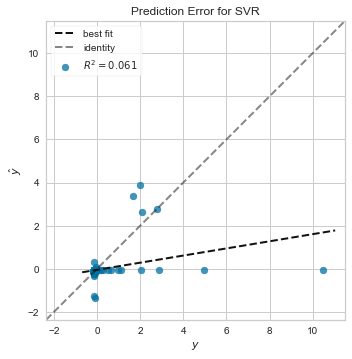

In [50]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(regressor)

visualizer.fit(trainX, trainY)  # Fit the training data to the visualizer
visualizer.score(testX, testY)  # Evaluate the model on the test data
visualizer.show()  




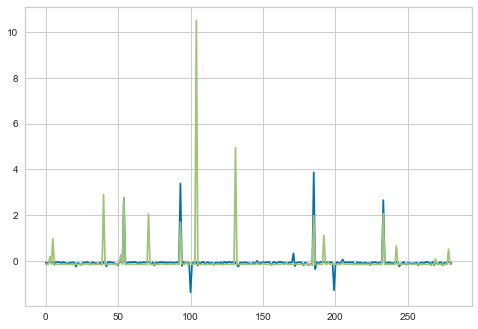

In [51]:
y_pred = regressor.predict(testX)
import matplotlib.pyplot as plt
plt.plot(list(y_pred.ravel()))
plt.plot(list(testY.ravel()))